In [47]:
####按照惯例导入两个常用的数据处理的包，numpy与pandas
import numpy as np
import pandas as pd
# 从csv文件读取数据，数据表格中只有5行，里面包含了float，string，int三种数据python类型，也就是分别对应的pandas的float64，object，int64
# csv文件中共有六列，第一列是表头，其余是数据。
os.chdir(r'd:/test1')
df = pd.read_excel("./sales_data_types.xlsx")
df

<IPython.core.display.Javascript object>

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,$125000,"$162,500.00",30%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$92,0000","$1012,000.00",25%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000","$62,500.00",10%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000","$490,000.00",4%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000","$12,750.00",-15%,Closed,2,2,2014,N


In [62]:
df['Customer Number'].astype('int')

0     10002
1    552278
2     23477
3     24900
4    651029
Name: Customer Number, dtype: int32

In [63]:
df.dtypes

Customer Number             int64
Customer Name              object
2016                      float64
2017                      float64
Percent Growth            float64
Jan Units                 float64
Month                       int64
Day                         int64
Year                        int64
Active                       bool
Start_date         datetime64[ns]
dtype: object

In [64]:
# 想要真正的改变数据框，通常需要通过赋值来进行，比如
df["Customer Number"] = df["Customer Number"].astype("int")
print(df)
print("--------"*10)
print(df.dtypes)

   Customer Number     Customer Name      2016       2017  Percent Growth  \
0            10002  Quest Industries  125000.0   162500.0            0.30   
1           552278    Smith Plumbing  920000.0  1012000.0            0.25   
2            23477   ACME Industrial   50000.0    62500.0            0.10   
3            24900        Brekke LTD  350000.0   490000.0            0.04   
4           651029         Harbor Co   15000.0    12750.0           -0.15   

   Jan Units  Month  Day  Year  Active Start_date  
0      500.0      1   10  2015    True 2015-01-10  
1      700.0      6   15  2014    True 2014-06-15  
2      125.0      3   29  2016    True 2016-03-29  
3       75.0     10   27  2015    True 2015-10-27  
4        NaN      2    2  2014   False 2014-02-02  
--------------------------------------------------------------------------------
Customer Number             int32
Customer Name              object
2016                      float64
2017                      float64
Percent 

In [49]:
df['2016']+df['2017']

0      $125000$162,500.00
1    $92,0000$1012,000.00
2       $50,000$62,500.00
3     $350,000$490,000.00
4       $15,000$12,750.00
dtype: object

In [50]:
def convert_currency(var):
    new_value=var.replace(',','').replace('$','')
    return float(new_value)


In [51]:
df['2016']=df['2016'].apply(convert_currency)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,"$162,500.00",30%,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,"$1012,000.00",25%,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,"$62,500.00",10%,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,"$490,000.00",4%,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,"$12,750.00",-15%,Closed,2,2,2014,N


In [52]:
df['2017']=df['2017'].apply(convert_currency)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30%,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,25%,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,10%,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,4%,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,12750.0,-15%,Closed,2,2,2014,N


In [53]:
df['Percent Growth']=df['Percent Growth'].apply(lambda x:x.replace('%','')).astype('float')/100
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,0.25,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,0.10,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,N


In [54]:
df["Active"] = np.where(df["Active"] == "Y", True, False)

df["Active"]

0     True
1     True
2     True
3     True
4    False
Name: Active, dtype: bool

In [57]:
df.dtypes

Customer Number      int64
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active                bool
dtype: object

In [58]:
# pandas中pd.to_numeric()处理Jan Units中的数据
pd.to_numeric(df["Jan Units"],errors='coerce').fillna(0)

0    500.0
1    700.0
2    125.0
3     75.0
4      0.0
Name: Jan Units, dtype: float64

In [59]:
# 最后利用pd.to_datatime()将年月日进行合并
pd.to_datetime(df[['Month', 'Day', 'Year']])

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]

In [60]:
# 做到这里不要忘记重新赋值，否则原始数据并没有变化
df["Jan Units"] = pd.to_numeric(df["Jan Units"],errors='coerce')
df["Start_date"] = pd.to_datetime(df[['Month', 'Day', 'Year']])

In [61]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Start_date
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,0.25,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,0.10,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False,2014-02-02


In [66]:
# 将这些转化整合在一起
def convert_percent(val):
    """
    Convert the percentage string to an actual floating point percent
    - Remove %
    - Divide by 100 to make decimal
    """
    new_val = val.replace('%', '')
    return float(new_val) / 100

df_2 = pd.read_excel("sales_data_types.xlsx",dtype={"Customer_Number":"int"},converters={
    "2016":convert_currency,
    "2017":convert_currency,
    "Percent Growth":convert_percent,
    "Jan Units":lambda x:pd.to_numeric(x,errors="coerce"),
    "Active":lambda x: np.where(x=="Y",True,False)
})
df_2.dtypes

Customer Number      int64
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active                bool
dtype: object

In [68]:
df_2

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.25,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.10,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,NaN,2,2,2014,False


## pandas apply 函数使用心得

In [ ]:
def myreplace(item):
    item_r=item.replace('\n','')
    item_rr=item_r.replace('\\n','')
    item_rr=item_rr.replace(' ','')
    return item_rr

all_train_data['contents']=all_train_data['contents'].apply(myreplace) # 这是正确的

all_train_data['contents'].apply(myreplace) # 这是错误的


### 使用 apply 之后并不能改变原 DataFrame 的值，需要将返回值赋给所修改的列或行才能对原 DataFrame 进行修改！

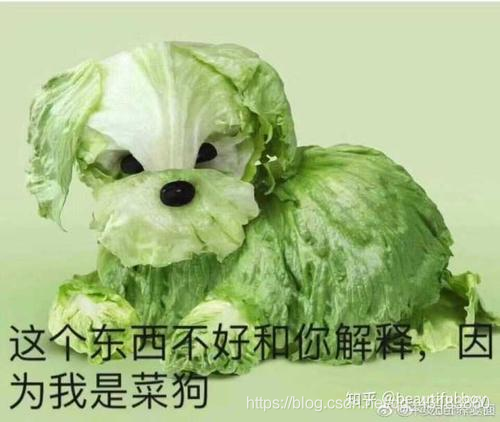

In [71]:
import numpy as np 
import pandas as pd 

# fillna () 会填充 nan 数据，返回填充后的结果。如果希望在原 DataFrame 中修改，则把 inplace 设置为 True


df = pd.DataFrame({'id':[1, 2, np.nan, 4, np.nan, 6, 1, 2, 3], 'item1':[1, 2, 3, 4, np.nan, 6, 1, 2, 3], 'item2':[1, 2, 3, 4, 5, 6, 1, np.nan, 3]})
print(df)
df.fillna(0, inplace = True)
print(df)

    id  item1  item2
0  1.0    1.0    1.0
1  2.0    2.0    2.0
2  NaN    3.0    3.0
3  4.0    4.0    4.0
4  NaN    NaN    5.0
5  6.0    6.0    6.0
6  1.0    1.0    1.0
7  2.0    2.0    NaN
8  3.0    3.0    3.0
    id  item1  item2
0  1.0    1.0    1.0
1  2.0    2.0    2.0
2  0.0    3.0    3.0
3  4.0    4.0    4.0
4  0.0    0.0    5.0
5  6.0    6.0    6.0
6  1.0    1.0    1.0
7  2.0    2.0    0.0
8  3.0    3.0    3.0


In [72]:
# pandas 中 apply 筛选数据
# 按照行筛选

data=np.arange(0,16).reshape(4,4)
data=pd.DataFrame(data,columns=['0','1','2','3'])

In [74]:
def f(x):
    return x.sum()>22
print(data)
data=data[data.apply(f,axis=1)]
data

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


,0,1,2,3
2,8,9,10,11
3,12,13,14,15


In [78]:
# 列元素

data1=np.arange(0,16).reshape(4,4)
data1=pd.DataFrame(data1,columns=['0','1','2','3'])
def f(x):
    return x-1
print(data1)
print(data1.loc[:,['0','1']].apply(f))

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
    0   1
0  -1   0
1   3   4
2   7   8
3  11  12


In [79]:
# 行元素

print(data1)
print(data1.loc[[0,1]].apply(f))


    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
   0  1  2  3
0 -1  0  1  2
1  3  4  5  6


In [81]:
# 列 

def f(x):
    return x.max()

print(data1)
print(data1.apply(f))


    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
0    12
1    13
2    14
3    15
dtype: int64


In [82]:
# 行 

def f(x):
    return x.max()
print(data1)
print(data1.apply(f,axis=1))

    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
0     3
1     7
2    11
3    15
dtype: int64
